<a href="https://colab.research.google.com/github/Ashutosh07/MyPythonProject/blob/main/Bank%20Marketting%20Data%20Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIT742: Modern Data Science 
**(Assessment Task 02: Bank Marketing Data Analytics)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

**Project Group Information:**

- Names:
         Ashutosh Shukla
         Karthik Mudayanti
         Sriram Tejeswar Musarakallu
                      
- Student IDs: 
          217669865
          218353626
          218641396
- Emails:
          shuklaa@deakin.edu.au
          kmudayanti@deakin.edu.au
          smusarakallu@deakin.edu.au
---

# 1.Import Spark

In [ ]:
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"

  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession 
from pyspark import SparkContext
from pyspark.sql import SQLContext
sc = SparkContext.getOrCreate()

# 2.Read and check data

In [ ]:
import wget
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2019/data/bank.csv'
DataSet = wget.download(link_to_data)

In [ ]:
!ls

sample_data
bank.csv  sample_data  spark-2.4.0-bin-hadoop2.7  spark-2.4.0-bin-hadoop2.7.tgz


In [ ]:
# Import the 'bank.csv' as a Spark dataframe and name it as df
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
df = spark.read.csv('bank.csv', header = True, inferSchema = True) 
df.printSchema() 
df.show(5)

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)

+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+-------+--

In [ ]:
# Check data distribution
# You may use printSchema() 
df.describe(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']).show()

+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+------------------+------------------+------------------+--------+-------+
|summary|               age|    job| marital|education|default|           balance|housing| loan|          campaign|             pdays|          previous|poutcome|deposit|
+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+------------------+------------------+------------------+--------+-------+
|  count|             11162|  11162|   11162|    11162|  11162|             11162|  11162|11162|             11162|             11162|             11162|   11162|  11162|
|   mean|41.231947679627304|   null|    null|     null|   null|1528.5385235620856|   null| null| 2.508421429851281| 51.33040673714388|0.8325568894463358|    null|   null|
| stddev|11.913369192215518|   null|    null|     null|   null| 3225.413325946149|   null| null|2.7220771816614824|108.75828197197717| 2.29200721

# 3.Select features

In [ ]:
#Select features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit') as df2
df2=df.select('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit')


In [ ]:
#Remove invalid rows/records using spark.sql 
df2.printSchema()
 
#Showing first 5 rows of df2
df2.show(5)
 
 
#Register df2 as table "bank"
df2.registerTempTable("bank")
 
#Using spark.sql filter out rows with attributes with "unknown"
#Not all attribute are having "unknown" value, so not all attributes put into this section.
#Hence, poutcome can only be "success" or "failure", so row with "other" in this attribute also will be filter out. 
df3=spark.sql("SELECT * FROM bank WHERE job <> 'unknown' AND education <> 'unknown' AND poutcome <> 'unknown' AND poutcome <> 'other'")

#Showing contents of filtered dataframe
df3.printSchema() 
 
#..and first 5 rows
df3.show(5)

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)

+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
| 59|    admin.|married|secondary|     no|   2343|    yes|  no|       1|   -1|       0| unknown|    yes|
| 56|    admin.|married|secondary|     no|     45|     no|  no|       

In [ ]:
#Covert categorical features to metric features using One hot encoding
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator
from pyspark.ml.feature import VectorAssembler
 
#Transforme categorical data into indexes for further transformation by StringIndexer.
#This step is to selecting categorical attributes for transforme into indexes
indexers=[StringIndexer(inputCol=column, outputCol=column+"_index").fit(df3) for column in list(set(df3.columns)-set(['age', 'balance', 'campaign', 'pdays', 'previous','deposit']))]
 
#Transforme multiple categorical attributres by with the help of Pipeline.
pipeline=Pipeline(stages=indexers)
df4=pipeline.fit(df3).transform(df3)
 
#Defining what columns should use One-Hot Encoding, and also the output columns.
encoder=OneHotEncoderEstimator(inputCols=["housing_index", "marital_index", "default_index", "loan_index", "job_index", "education_index", "poutcome_index"],
                              outputCols=["housing_vec", "marital_vec", "default_vec", "loan_vec", "job_vec", "education_vec", "poutcome_vec"])
 
#Step of One-Hot Encoding transformation.
model_ohe=encoder.fit(df4)
df5=model_ohe.transform(df4)
 
#Delect the original and index data for categorical attribues, only left the transformed result and numerical data.
df6=df5.select([column for column in df5.columns if column not in ["housing", "marital", "default", "loan", "job", "education", "poutcome", 
                                                                  "housing_index", "marital_index", "default_index", "loan_index", "job_index", "education_index", "poutcome_index"]])
 
#Assemble all features into one attribute, for prepare of normalization.
assembler=VectorAssembler(inputCols=["age", "balance", "campaign", "pdays", "previous", "job_vec", "education_vec", "marital_vec", "poutcome_vec", "housing_vec", "loan_vec", "default_vec"], outputCol="features")
df7=assembler.transform(df6)
 
#Only left the feature attribute.
df8=df7.select("features")
 
#...and also showing the content
df8.printSchema()
 
 
from pyspark.ml.feature import StringIndexer
#Because the attribute "deposit" is also the label, so we select "deposit" to a single dataframe as y
y_df1=df3.select("deposit")
 
#...also transforme label into index type by using StringIndexer
indexer=StringIndexer(inputCol="deposit", outputCol="deposit_index")
y_df2=indexer.fit(y_df1).transform(y_df1)
 
#...and store as y
y=y_df2.select('deposit_index')
 
y.printSchema()

root
 |-- features: vector (nullable = true)

root
 |-- deposit_index: double (nullable = false)



## 3.1 normalisation

In [ ]:
#Apply Min-Max normalisation on each attribute using MinMaxScaler  
from pyspark.ml.feature import MinMaxScaler 
 
#Using MinMaxScaler for column "features" normalnization
scaler=MinMaxScaler(inputCol="features", outputCol="scaledFeatures")
scalerModel=scaler.fit(df8)
scaled=scalerModel.transform(df8)
 
#Print the scaled range
print("Features scaled to range: [%f, %f]" % (scaler.getMin(), scaler.getMax()))
 
#...and also store as dataframe X
X=scaled.select("scaledFeatures")
X.show(truncate=False)
 

 
from pyspark.sql.functions import monotonically_increasing_id 
 
#Generating "id" for both X and y dataframe for merging
X_index = X.select("*").withColumn("id", monotonically_increasing_id())
y_index = y.select("*").withColumn("id", monotonically_increasing_id())
 
#Merging X and y into one dataframe
data_model = y_index.join(X_index, "id", "outer").drop("id") 
 
#Transform into dataframe, store as df100
df100=data_model.toDF('label', 'features')
df100.show()

Features scaled to range: [0.000000, 1.000000]
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|scaledFeatures                                                                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[0.21428571428571427,0.05334664361715079,0.0,0.10550996483001172,0.05555555555555555,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0]                  |
|[0.5428571428571428,0.018589759197487277,0.0,0.17116060961313012,0.018518518518518517,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0]                 |
|[0.22857142857142856,0.02236371162133866,0.0,0.198124267291910

# 4.Unsupervised learning

## 4.1 K-means

In [ ]:
# Perform unsupervised learning on df2 with k-means 
# You can use whole df2 as both training and testing data, 
# Evaluate the clustering result using Accuracy.  

from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator 
from pyspark.ml.feature import StringIndexer
from pyspark.sql.types import DoubleType

#Setting up k-means cluster parameter
#Because we need to "estimate" the label of data, so we only performe 2 cluster for getting close to the binomial label...
k_means=KMeans().setK(2).setSeed(1)

#Applying k-means cluster
cluster=k_means.fit(df100)
cluster_predictions=cluster.transform(df100)

#First evalustor for cluster: ClusteringEvaluator, by using silhouette criteria
evaluator=ClusteringEvaluator()
silhouette = evaluator.evaluate(cluster_predictions)
print("Silhouette with squared distnce is :" + str(silhouette))

#The second evalustor: MulticlassClassificationEvaluator, by using accuracy criteria
kmeans_acc_evaluator = MulticlassClassificationEvaluator()

#But first we need to transfrome datatype for k-means model's prediction: integer to binomial
cluster_predictions.printSchema()
cluster_predictions_1 = cluster_predictions.withColumn("prediction", cluster_predictions["prediction"].cast("double"))

#Then apply accuracy criteria for cluster model
print("Test Accuracy: " + str(kmeans_acc_evaluator.evaluate(cluster_predictions_1, {kmeans_acc_evaluator.metricName: "accuracy"})))

#Showing the centroids of cluster.
centers = cluster.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

#...and showing some prediction result for k-means cluster model
cluster_predictions_1.show()


Silhouette with squared distnce is :0.30166852656793497
root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- prediction: integer (nullable = false)

Test Accuracy: 0.5341586428243925
Cluster Centers: 
[0.40558781 0.03262809 0.07362449 0.23606089 0.03959039 0.22060958
 0.15457184 0.1436865  0.14223512 0.13497823 0.08345428 0.00362845
 0.04426705 0.02902758 0.02177068 0.55587808 0.30261248 0.89550073
 0.         0.55442671 0.53265602 0.88171263 0.99709724]
[0.22914072 0.03265488 0.07641798 0.23764634 0.03726765 0.31257783
 0.17559153 0.13947696 0.09339975 0.0124533  0.0498132  0.11083437
 0.03237858 0.04234122 0.01618929 0.40473225 0.56288917 0.
 0.92403487 0.51307597 0.5765878  0.9377335  0.99626401]
+-----+--------------------+----------+
|label|            features|prediction|
+-----+--------------------+----------+
|  0.0|[0.32857142857142...|       1.0|
|  0.0|[0.18571428571428...|       1.0|
|  0.0|[0.55714285714285...|       0.0|
|  0.0|[0.2714285

## 4.2 PCA

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------+
|scaledFeatures                                                                                                                                                                 |pcaFeatures                               |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------+
|[0.21428571428571427,0.05334664361715079,0.0,0.10550996483001172,0.05555555555555555,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0]                  |[-0.9636424850516062,0.3313811478935342]  |
|[0.5428571428571428,0.018589759197487277,0.0,0.17116060961313012,0.018518518518518517,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0

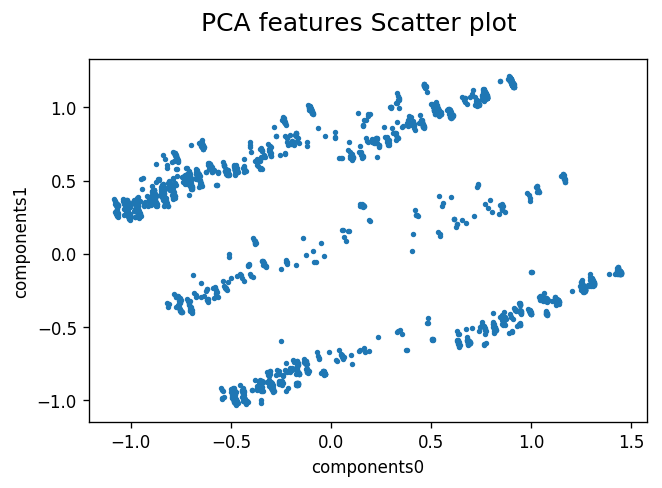

In [ ]:
#Generate a scatter plot using the first two PCA components to investigate the data distribution.
from pyspark.ml.feature import PCA, VectorAssembler
from pyspark.ml.linalg import Vectors
import matplotlib.pyplot as plt
import numpy as np

#Setting up PCA parameters, only 2 compinents for plotting
pca = PCA(k=2, inputCol="scaledFeatures", outputCol="pcaFeatures")

#Applying PCA for dataset (df100)
model_pca = pca.fit(X)
result_pca = model_pca.transform(X)

#Showing some result for PCA
result_pca.show(truncate=False)

#We need to transforme PCA components into numpy array format for plotting...
#Transforme to numpy array also benefits for splitting two PCA components.
np_pca_1 = np.array(result_pca.select('pcaFeatures').collect())

#Some format setting for numpy array for plotting...removing 1 level for array
np_pca = np_pca_1[ :, 0, :]

#Scatter plot settings, including size of graph, title, x/y labels, and dot size
plt.figure(dpi=120)
plt.suptitle('PCA features Scatter plot', fontsize=15)
plt.xlabel('components0', fontsize=10)
plt.ylabel('components1', fontsize=10)
plt.scatter(np_pca[:,0], np_pca[:,1], s=5, alpha=1)


# 5.Supervised learning

In [ ]:
train, test = df2.randomSplit([0.7, 0.3], seed = 742)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 7822
Test Dataset Count: 3340


## 5.1 LogisticRegression

Training Dataset Count: 1515
Test Dataset Count: 666
[0.08910052817040996,-2.5330391889470287,1.5744419935232437,0.22334012696117736,-2.137014520719571,-0.08064996315380436,0.08988190479135173,0.16160485237167804,0.3936296057030715,-0.22968167480297885,0.02027481125246283,-0.7113651098476432,-0.5521203015431844,0.2194744901860317,0.30114497106669935,-0.1273254231111347,-0.10298363991604886,-0.07956266029999945,-0.007122973868905803,1.8494736254287796,-0.8079248235357885,-0.43604087035913586,-0.3235831515951325]
+-----+--------------------+--------------------+----------+--------------------+
|label|            features|       rawPrediction|prediction|         probability|
+-----+--------------------+--------------------+----------+--------------------+
|  0.0|[0.18571428571428...|[2.11773312589031...|       0.0|[0.89261483479767...|
|  0.0|[0.55714285714285...|[0.41467894590012...|       0.0|[0.60220926985505...|
|  1.0|[0.28571428571428...|[-0.1737973620798...|       1.0|[0.4566596976

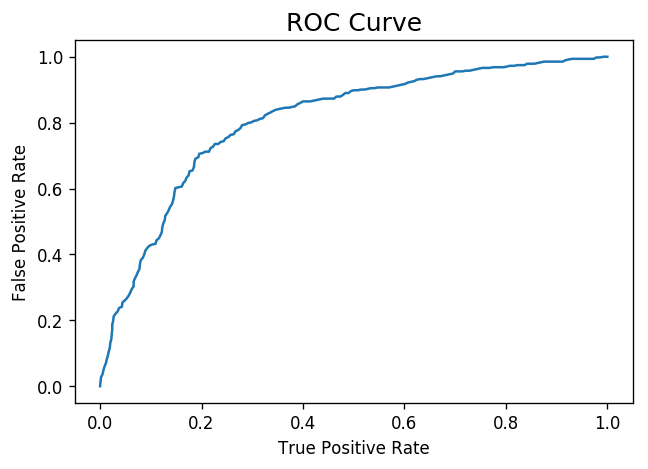

Training set areaUnderROC: 0.806791036287112
Test Area Under ROC: 0.8196603354319874
Test Accuracy: 0.7717717717717718


In [ ]:
#Splitting dataframe into traning set and test set
train, test = df100.randomSplit([0.7, 0.3], seed = 742)

#...and print how many rows in both traning and test set. 
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))



# Logistic Regression
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

#Setting up LogisticRegression parametrs
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)

#Training LogisticRegression model
lrModel = lr.fit(train)

#...and apply to test set
lr_predictions = lrModel.transform(test)

coefficients = lrModel.coefficients
print(coefficients)

#Showing some prediction result for LogisticRegression
lr_predictions.select('label', 'features', 'rawPrediction', 'prediction', 'probability').show(10)

#Selecitng BinaryClassificationEvaluator and MulticlassClassificationEvaluator as the ROC/accuracy evaluator
lr_evaluator = BinaryClassificationEvaluator()
lr_acc_evaluator = MulticlassClassificationEvaluator()

#Generating traning summary for LogisticRegression
lr_trainingSummary = lrModel.summary

#Transforming summary's ROC part to dataframe
lr_roc = lr_trainingSummary.roc.toPandas()

#...and start plotting
plt.figure(dpi=120)
plt.title('ROC Curve', fontsize=15)
plt.xlabel('True Positive Rate', fontsize=10)
plt.ylabel('False Positive Rate', fontsize=10)
plt.plot(lr_roc['FPR'],lr_roc['TPR'])
plt.show()

#Showing AUC for training set
print('Training set areaUnderROC: ' + str(lr_trainingSummary.areaUnderROC))

#Showing AUC for test set
print("Test Area Under ROC: " + str(lr_evaluator.evaluate(lr_predictions, {lr_evaluator.metricName: "areaUnderROC"})))

#Showing accuracy for Logistic Regression predicting test set.
print("Test Accuracy: " + str(lr_acc_evaluator.evaluate(lr_predictions, {lr_acc_evaluator.metricName: "accuracy"})))



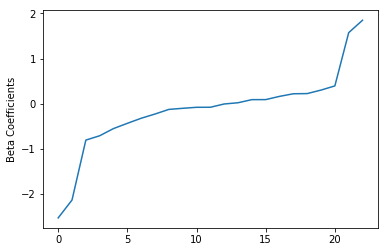

In [ ]:
#Exam the coefficients
import matplotlib.pyplot as plt
import numpy as np

#Storing coefficients into numpy array
beta = np.sort(lrModel.coefficients)

#...and plotting
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

## 5.2 Decision tree

In [ ]:
#Decision tree
from pyspark.ml.classification import DecisionTreeClassifier 

#Setting up Decision Tree Classifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 5)

#Training Decision Tree model...
dtModel = dt.fit(train)

#...and apply to test set
dt_predictions = dtModel.transform(test)

#Showing some predictions for Decision Tree model on test set
dt_predictions.select('label', 'features', 'rawPrediction', 'prediction', 'probability').show(10)

#Importing two evaluator as same as LogisticRegression
dt_evaluator = BinaryClassificationEvaluator()
dt_acc_evaluator = MulticlassClassificationEvaluator()

#Showing AUC for test set
print("Test Area Under ROC: " + str(dt_evaluator.evaluate(dt_predictions, {dt_evaluator.metricName: "areaUnderROC"})))

#Showing accuracy for test set
print("Test Accuracy: " + str(dt_acc_evaluator.evaluate(dt_predictions, {dt_acc_evaluator.metricName: "accuracy"})))

+-----+--------------------+-------------+----------+--------------------+
|label|            features|rawPrediction|prediction|         probability|
+-----+--------------------+-------------+----------+--------------------+
|  0.0|[0.18571428571428...| [309.0,37.0]|       0.0|[0.89306358381502...|
|  0.0|[0.55714285714285...|   [73.0,9.0]|       0.0|[0.89024390243902...|
|  1.0|[0.28571428571428...|[141.0,286.0]|       1.0|[0.33021077283372...|
|  0.0|[0.21428571428571...|[141.0,286.0]|       1.0|[0.33021077283372...|
|  0.0|[0.21428571428571...|   [73.0,9.0]|       0.0|[0.89024390243902...|
|  0.0|[0.65714285714285...|    [0.0,2.0]|       1.0|           [0.0,1.0]|
|  1.0|[0.52857142857142...|  [77.0,62.0]|       0.0|[0.55395683453237...|
|  0.0|[0.2,0.0141584086...|[141.0,286.0]|       1.0|[0.33021077283372...|
|  0.0|[0.31428571428571...|[141.0,286.0]|       1.0|[0.33021077283372...|
|  0.0|[0.32857142857142...| [298.0,15.0]|       0.0|[0.95207667731629...|
+-----+------------------

## 5.3 NaiveBayes

In [ ]:
#NaiveBayes
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#Setting up NaiveBayes model
by = NaiveBayes(featuresCol = 'features', labelCol = 'label')

#Training NaiveBayes model...
byModel = by.fit(train)

#...and apply to test set
by_predictions = byModel.transform(test)

#Showing some predictions for aiveBayes model on test set
by_predictions.select('label', 'features', 'rawPrediction', 'prediction', 'probability').show(10)

#Importing two evaluator as same as LogisticRegression
by_evaluator = BinaryClassificationEvaluator()
by_acc_evaluator = MulticlassClassificationEvaluator()

#Showing AUC for test set
print("Test Area Under ROC: " + str(by_evaluator.evaluate(by_predictions, {by_evaluator.metricName: "areaUnderROC"})))

#Showing accuracy for test set
print("Test Accuracy: " + str(by_acc_evaluator.evaluate(by_predictions, {by_acc_evaluator.metricName: "accuracy"})))

+-----+--------------------+--------------------+----------+--------------------+
|label|            features|       rawPrediction|prediction|         probability|
+-----+--------------------+--------------------+----------+--------------------+
|  0.0|[0.18571428571428...|[-14.783775233728...|       0.0|[0.84410063258126...|
|  0.0|[0.55714285714285...|[-19.048538920690...|       0.0|[0.74878757430767...|
|  1.0|[0.28571428571428...|[-18.398229673645...|       0.0|[0.58751182730099...|
|  0.0|[0.21428571428571...|[-17.990454520573...|       1.0|[0.41573954066616...|
|  0.0|[0.21428571428571...|[-19.611940391948...|       0.0|[0.82906266777012...|
|  0.0|[0.65714285714285...|[-20.015253792344...|       0.0|[0.93162729210364...|
|  1.0|[0.52857142857142...|[-21.444464827817...|       0.0|[0.82524335053180...|
|  0.0|[0.2,0.0141584086...|[-17.615862065040...|       1.0|[0.30220553421147...|
|  0.0|[0.31428571428571...|[-18.585433793006...|       0.0|[0.58310791765286...|
|  0.0|[0.328571